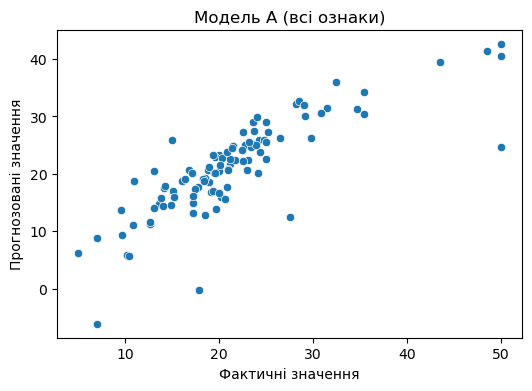

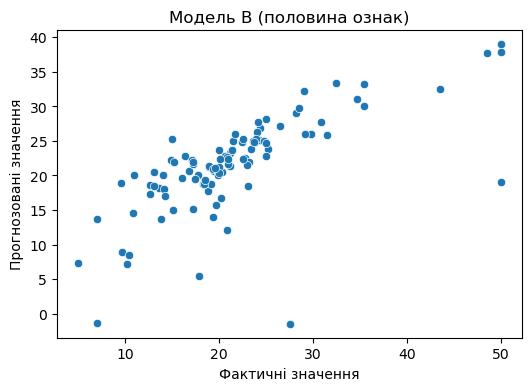

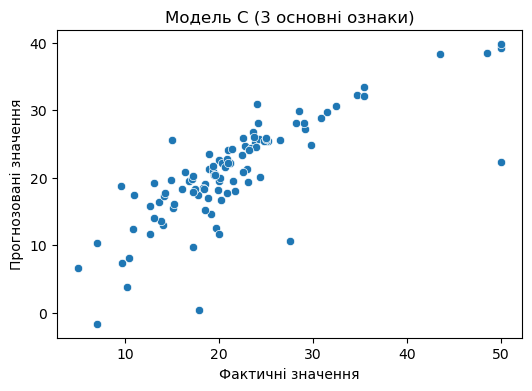

                                  R^2   Adj R^2        MSE      RMSE  \
Модель A (всі ознаки)        0.668759  0.660007  24.291119  4.928602   
Модель B (половина ознак)    0.492932  0.486835  37.185233  6.097970   
Модель C (3 основні ознаки)  0.630253  0.628043  27.114957  5.207202   

                                  MAE  Explained Variance  
Модель A (всі ознаки)        3.189092            0.669518  
Модель B (половина ознак)    3.861973            0.492951  
Модель C (3 основні ознаки)  3.332538            0.635121  


In [5]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from scipy.stats import uniform

# Вимкнення попереджень
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# 1. Завантаження даних]
df = pd.read_csv("boston.csv")

# 2. Визначення X та y
X = df.drop(columns=['MEDV'])  # Ознаки
y = df['MEDV']  # Цільова змінна

# 3. Розбиття на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Створення моделей
models = {
    'Модель A (всі ознаки)': LinearRegression(),
    'Модель B (половина ознак)': LinearRegression(),
    'Модель C (3 основні ознаки)': LinearRegression()
}

# Вибір важливих ознак
important_features = X.columns[:len(X.columns)//2]  # Половина ознак
best_features = ['RM', 'LSTAT', 'PTRATIO']  # Найважливіші ознаки

# 5. Навчання моделей та оцінка
results = {}
for name, model in models.items():
    if 'B' in name:
        X_train_sub, X_test_sub = X_train[important_features], X_test[important_features]
    elif 'C' in name:
        X_train_sub, X_test_sub = X_train[best_features], X_test[best_features]
    else:
        X_train_sub, X_test_sub = X_train, X_test
    
    model.fit(X_train_sub, y_train)
    y_pred = model.predict(X_test_sub)
    
    results[name] = {
        'R^2': r2_score(y_test, y_pred),
        'Adj R^2': 1 - (1 - r2_score(y_test, y_pred)) * (len(y) - 1) / (len(y) - X_train_sub.shape[1] - 1),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Explained Variance': explained_variance_score(y_test, y_pred)
    }
    
    # Візуалізація
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Фактичні значення")
    plt.ylabel("Прогнозовані значення")
    plt.title(f"{name}")
    plt.show()

# 6. Вивід результатів
results_df = pd.DataFrame(results).T
print(results_df)